In [1]:
!pip install tensorflow

In [2]:
!unzip digit_recognizer.zip

Archive:  digit_recognizer.zip
  inflating: train.csv               


In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models, datasets
import matplotlib.pyplot as plt


In [4]:
# dataset
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

train_images, test_images = train_images / 255.0, test_images / 255.0

train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)


11490434/11490434 [==============================] - 0s 0us/step


In [5]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])


In [6]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [7]:
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))


Epoch 1/10
1875/1875 [==============================] - 64s 33ms/step - loss: 0.1494 - accuracy: 0.9542 - val_loss: 0.0513 - val_accuracy: 0.9838
Epoch 2/10
1875/1875 [==============================] - 61s 32ms/step - loss: 0.0471 - accuracy: 0.9856 - val_loss: 0.0356 - val_accuracy: 0.9884
Epoch 3/10
1875/1875 [==============================] - 60s 32ms/step - loss: 0.0337 - accuracy: 0.9895 - val_loss: 0.0352 - val_accuracy: 0.9883
Epoch 4/10
1875/1875 [==============================] - 60s 32ms/step - loss: 0.0261 - accuracy: 0.9916 - val_loss: 0.0343 - val_accuracy: 0.9892
Epoch 5/10
1875/1875 [==============================] - 60s 32ms/step - loss: 0.0205 - accuracy: 0.9934 - val_loss: 0.0326 - val_accuracy: 0.9904
Epoch 6/10
1875/1875 [==============================] - 62s 33ms/step - loss: 0.0159 - accuracy: 0.9950 - val_loss: 0.0290 - val_accuracy: 0.9917
Epoch 7/10
1875/1875 [==============================] - 65s 34ms/step - loss: 0.0140 - accuracy: 0.9955 - val_loss: 0.0273 -

In [8]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'Test accuracy: {test_acc}')


313/313 - 3s - loss: 0.0415 - accuracy: 0.9913 - 3s/epoch - 8ms/step
Test accuracy: 0.9912999868392944


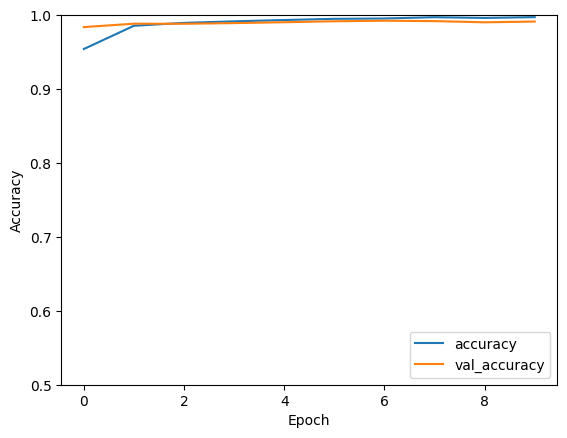

In [9]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()
